An agent-based model for modeling the dynamics in the "RPG system" environment. That is, the world where humans and monsters have the game-like system rewarding murder with XP. In this simulation, we choose bears as "monsters".

It's unclear which strategy is the best for predators: to kill every other competitor in the pursuit of those precious XP points, or to stay as far from others as possible. Let's find it out!

## Terms

Bears spend **energy** to stay alive, while sheep doesn't (just to simplify the model). Bears gain energy from eating sheep (`bear_gain_from_food`), but not after killing bears (no cannibalism). Female bears give half of her energy to newborn cubs.

Bears gain **XP** after each murder. For each sheep, they are getting a constant amount of XP (`xp_for_sheep`). For each murdered bear, they gain a base amount of XP (`xp_for_bear`)  and half of the XP attained by the slain bear.

Not every sheep **hunt** succeeds, the chance to succeed depends on the bear level and a base chance (`hunt_succeed_chance`).

Bears enter in a **mating season** each `mating_season_frequency` seasons. During a mating season, bears don't attack opposite gender bears.

A female bear stays with her cubs for a certain amount of time, protecting them from the danger and assisting them in their hunts.

## Model assumptions

1. Hunting becomes easier the more levels the bear gains.
2. In a fight, a high-level bear has an edge on a low-level bear.
3. Females prefer males with a higher level and with the same behavior as them.


## Predator types

Bears divide into two types:
- __aggressive__, who attack everyone in the line of sight (they are very nasty bears, you see). The only exception is the mating season.
- __cowards__, who never attack anyone except for sheep.

__Cowards__ can only fight if they are attacked or their cubs are attacked. __Cowards__ care about their young longer that __aggressive__ ones, because their aggression levels are lowered. To compensate for this, __aggressive__ ones have bigger litter size.


## Distributions

Level progression and fights obey the exponential distribution. The more level a bear attains, the harder it becomes to level up and the easier it is to fight against others. Not every fight comes in favour of the higher leveled bear, but most of them.

Other random variables, like the number of cubs, are modeled by simple linear distribution.

In [1]:
import matplotlib.pyplot as plt

In [2]:
from model import BearSheepPredation

model = BearSheepPredation(sheep_reproduce=0.08,initial_sheep=1000,initial_cowards=150, initial_aggressive=150,xp_for_sheep=1)
model.run_model()
#server = ModularServer(WolfSheepPredation
print(model.datacollector.get_model_vars_dataframe())

Initial number wolves:  300
Initial number sheep:  1000
Initial coward bears:  150
Initial aggressive bears:  150
[1, 258, 148, 1062]
[2, 182, 118, 1154]
[3, 137, 102, 1267]
[4, 114, 92, 1337]
[5, 117, 100, 1399]
[6, 110, 98, 1498]
[7, 105, 95, 1597]
[8, 98, 91, 1707]
[9, 111, 107, 1810]
[10, 110, 106, 1946]
[11, 106, 104, 1980]
[12, 106, 104, 1973]
[13, 114, 112, 1976]
[14, 111, 109, 1977]
[15, 110, 109, 1975]
[16, 109, 108, 1975]
[17, 125, 124, 1975]
[18, 125, 124, 1977]
[19, 125, 124, 1967]
[20, 119, 118, 1979]
[21, 123, 122, 1979]
[22, 120, 120, 1978]
[23, 119, 119, 1974]
[24, 115, 115, 1979]
[25, 130, 130, 1977]
[26, 127, 127, 1967]
[27, 117, 117, 1982]
[28, 116, 116, 1977]
[29, 132, 132, 1971]
[30, 132, 132, 1971]
[31, 129, 129, 1972]
[32, 127, 127, 1961]
[33, 137, 137, 1976]
[34, 131, 131, 1968]
[35, 122, 122, 1978]
[36, 121, 121, 1968]
[37, 132, 132, 1977]
[38, 130, 130, 1977]
[39, 128, 128, 1973]
[40, 124, 124, 1971]
[41, 134, 134, 1981]
[42, 132, 132, 1980]
[43, 126, 126, 198

In [3]:
basic_experiment_df = model.datacollector.get_model_vars_dataframe()

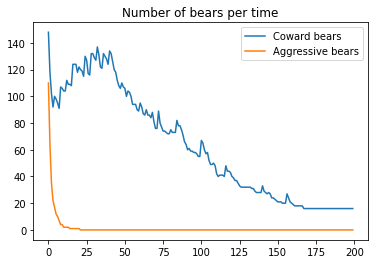

In [4]:
basic_experiment_df["Coward bears"].plot(label="Coward bears")
basic_experiment_df["Aggressive bears"].plot(label="Aggressive bears")
plt.title("Number of bears per time")
plt.legend()
plt.show()

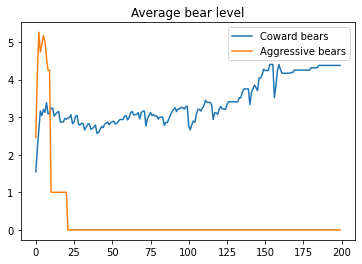

In [5]:
basic_experiment_df["Average coward level"].plot(label="Coward bears")
basic_experiment_df["Average aggressive level"].plot(label="Aggressive bears")
plt.title("Average bear level")
plt.legend()
plt.show()

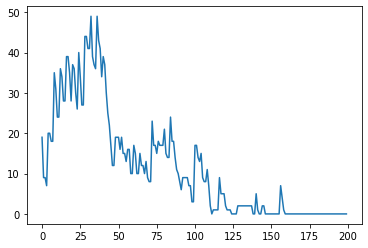

In [6]:
basic_experiment_df["Cubs"].plot(label="Cubs")
plt.show()

## Playground

Here, you can play with model parameters as you wish. Have fun!

In [7]:
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets

In [81]:
sliders_style = {'description_width': 'initial'}
sliders_layout = Layout(width = '100%')

hunt_succeed_chance_widget = widgets.FloatSlider(value=0.06, min=0, max=1, step=0.01,
                                                 description="Base hunt success chance",
                                                 style=sliders_style, layout=sliders_layout)
display(hunt_succeed_chance_widget)

sheep_energy_gain_widget = widgets.FloatLogSlider(value=40, min=0, max=6, step=0.02, description="Energy for eating a sheep",
                                                  style=sliders_style, layout=sliders_layout)
display(sheep_energy_gain_widget)

coward_litter_size_widget = widgets.IntRangeSlider(value=(1, 4), min=1, max=8, description = "Coward bear litter size",
                                                   style=sliders_style, layout=sliders_layout)
display(coward_litter_size_widget)

aggressive_litter_size_widget = widgets.IntRangeSlider(value=(1, 6), min=1, max=8, description = "Aggressive bear litter size",
                                                       style=sliders_style, layout=sliders_layout)
display(aggressive_litter_size_widget)

coward_parental_care_widget = widgets.IntRangeSlider(value=(8, 16), min=1, max=16, description = "Coward bear parental care time",
                                                   style=sliders_style, layout=sliders_layout)
display(coward_parental_care_widget)

aggressive_parental_care_widget = widgets.IntRangeSlider(value=(1, 8), min=1, max=16, description = "Aggressive bear parental care time",
                                                       style=sliders_style, layout=sliders_layout)
display(aggressive_parental_care_widget)

mating_season_widget = widgets.IntSlider(value=4, min=1, max=8, description="Mating season frequency",
                                         style=sliders_style, layout=sliders_layout)
display(mating_season_widget)

sheep_xp_widget = widgets.FloatLogSlider(value=3, min=0, max=6, step=0.02, description="XP for killing a sheep",
                                         style=sliders_style, layout=sliders_layout)
display(sheep_xp_widget)

base_bear_xp_widget = widgets.FloatLogSlider(value=3, min=0, max=7, step=0.02,description="Base XP for killing a bear",
                                             style=sliders_style, layout=sliders_layout)
display(base_bear_xp_widget)

FloatSlider(value=0.06, description='Base hunt success chance', layout=Layout(width='100%'), max=1.0, step=0.0…

FloatLogSlider(value=40.0, description='Energy for eating a sheep', layout=Layout(width='100%'), max=6.0, step…

IntRangeSlider(value=(1, 4), description='Coward bear litter size', layout=Layout(width='100%'), max=8, min=1,…

IntRangeSlider(value=(1, 6), description='Aggressive bear litter size', layout=Layout(width='100%'), max=8, mi…

IntRangeSlider(value=(8, 16), description='Coward bear parental care time', layout=Layout(width='100%'), max=1…

IntRangeSlider(value=(1, 8), description='Aggressive bear parental care time', layout=Layout(width='100%'), ma…

IntSlider(value=4, description='Mating season frequency', layout=Layout(width='100%'), max=8, min=1, style=Sli…

FloatLogSlider(value=3.0, description='XP for killing a sheep', layout=Layout(width='100%'), max=6.0, step=0.0…

FloatLogSlider(value=3.0, description='Base XP for killing a bear', layout=Layout(width='100%'), max=7.0, step…

In [84]:
from model import BearSheepPredation

model = BearSheepPredation(sheep_reproduce=0.08,initial_sheep=500,initial_aggressive=50,
                           bear_gain_from_food=int(sheep_energy_gain_widget.value),
                           mating_season_frequency=mating_season_widget.value,
                           coward_litter_size_range=coward_litter_size_widget.value,
                           aggressive_litter_size_range=aggressive_litter_size_widget.value,
                           coward_parental_care_range=coward_parental_care_widget.value,
                           aggressive_parental_care_range=aggressive_parental_care_widget.value,
                           encounter_rate=1,
                           xp_for_sheep = sheep_xp_widget.value,
                           xp_for_bear = base_bear_xp_widget.value)
model.run_model()
#server = ModularServer(WolfSheepPredation
print(model.datacollector.get_model_vars_dataframe())
playground_df = model.datacollector.get_model_vars_dataframe()

Initial number wolves:  100
Initial number sheep:  500
Initial coward bears:  50
Initial aggressive bears:  50
[1, 90, 45, 539]
[2, 68, 38, 592]
[3, 54, 31, 652]
[4, 40, 26, 697]
[5, 36, 24, 754]
[6, 29, 21, 814]
[7, 27, 20, 875]
[8, 23, 18, 950]
[9, 21, 17, 1025]
[10, 18, 16, 1104]
[11, 15, 14, 1213]
[12, 14, 13, 1314]
[13, 13, 13, 1433]
[14, 13, 13, 1562]
[15, 13, 13, 1672]
[16, 13, 13, 1825]
[17, 15, 15, 1983]
[18, 14, 14, 2000]
[19, 13, 13, 1998]
[20, 13, 13, 2000]
[21, 13, 13, 1998]
[22, 13, 13, 1999]
[23, 13, 13, 1997]
[24, 13, 13, 1999]
[25, 13, 13, 1998]
[26, 13, 13, 1999]
[27, 13, 13, 1998]
[28, 13, 13, 1999]
[29, 15, 15, 1997]
[30, 15, 15, 2000]
[31, 15, 15, 1998]
[32, 15, 15, 1998]
[33, 19, 19, 1997]
[34, 19, 19, 1998]
[35, 18, 18, 1997]
[36, 18, 18, 1996]
[37, 20, 20, 2000]
[38, 20, 20, 2000]
[39, 17, 17, 1999]
[40, 16, 16, 1998]
[41, 18, 18, 1998]
[42, 18, 18, 1997]
[43, 18, 18, 1998]
[44, 18, 18, 1997]
[45, 18, 18, 1998]
[46, 18, 18, 1997]
[47, 18, 18, 1993]
[48, 18, 18, 

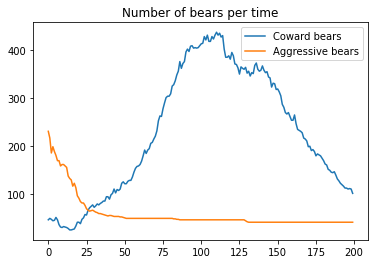

In [65]:
playground_df["Coward bears"].plot(label="Coward bears")
playground_df["Aggressive bears"].plot(label="Aggressive bears")
plt.title("Number of bears per time")
plt.legend()
plt.show()

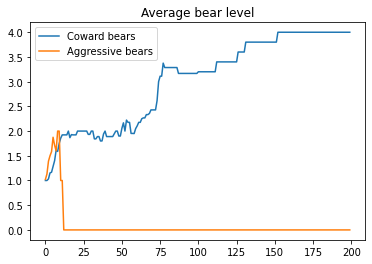

In [86]:
playground_df["Average coward level"].plot(label="Coward bears")
playground_df["Average aggressive level"].plot(label="Aggressive bears")
plt.title("Average bear level")
plt.legend()
plt.show()

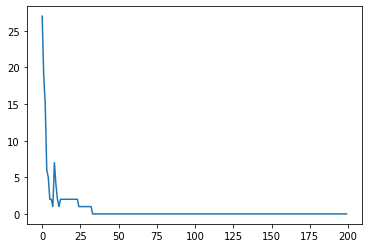

In [12]:
playground_df["Cubs"].plot(label="Cubs")
plt.show()